In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from tqdm import trange
import matplotlib.pylab as pl
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d, CubicSpline
from scipy.ndimage import gaussian_filter

plt.style.use('/home/gabriele/Desktop/PyCharm_env/mine.mplstyle')
plt.rcParams["axes.axisbelow"] = False

In [2]:
##############################
###   LOAD RELEVANT DATA:  ###
##############################

#File Directory:
files_dir="/home/gabriele/Desktop/JupiterNotebook_projects/phase_shift_paper_plots/files/"

#Main Plots Directory:
main_plots_dir="/home/gabriele/Desktop/JupiterNotebook_projects/phase_shift_paper_plots/main_plots/"

#Load K_ell for all N_eff\in(1,6)
"""
File structure: (100,4,4999)
    (1) 100 values of Neff \in [1,6]
    (2) 4 entries for: ells, K_TT, K_EE, K_TE
    (4) 4999 values of ells each
"""
Kells_TT_EE_TE=np.load(files_dir+"Kls_lens_noisw_norm.npy",allow_pickle=True)

#Load the computed \delta_\ell used to evaluate the SBT:
dells_lens_TT, dells_lens_EE, dells_lens_TE=np.load(files_dir+"dells_TT_EE_TE.npy",allow_pickle=True)
ell_pksTT_lcdm_lens,dell_TT_avg_lens,dell_TT_std_lens=dells_lens_TT
ell_pksEE_lcdm_lens,dell_EE_avg_lens,dell_EE_std_lens=dells_lens_EE
ell_pksTE_lcdm_lens,dell_TE_avg_lens,dell_TE_std_lens=dells_lens_TE

#Load the obtained SBT, as well as its \pm 1,2\sigma uncertainty:

SBT_info=np.load(files_dir+"phase_shift_Kell_template.npy",allow_pickle=True)
ells_SBT, f_ell_best_fit, f_ell_1msigma, f_ell_1psigma,f_ell_2msigma, f_ell_2psigma=SBT_info


#Global Variables:

Neff_less=np.linspace(1, 2.9, num=50)
Neff_more=np.linspace(3.1, 6, num=50)
N_eff=np.zeros(100)
N_eff[:50]=Neff_less
N_eff[50:]=Neff_more


# 1. $\mathcal{K}^{XY}_\ell$ plots for $N_{\rm{eff}}\in[1,6]$ and $\rm{XY}=\{\rm{TT},\,\rm{EE},\,\rm{TE}\}$

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 278.99it/s]


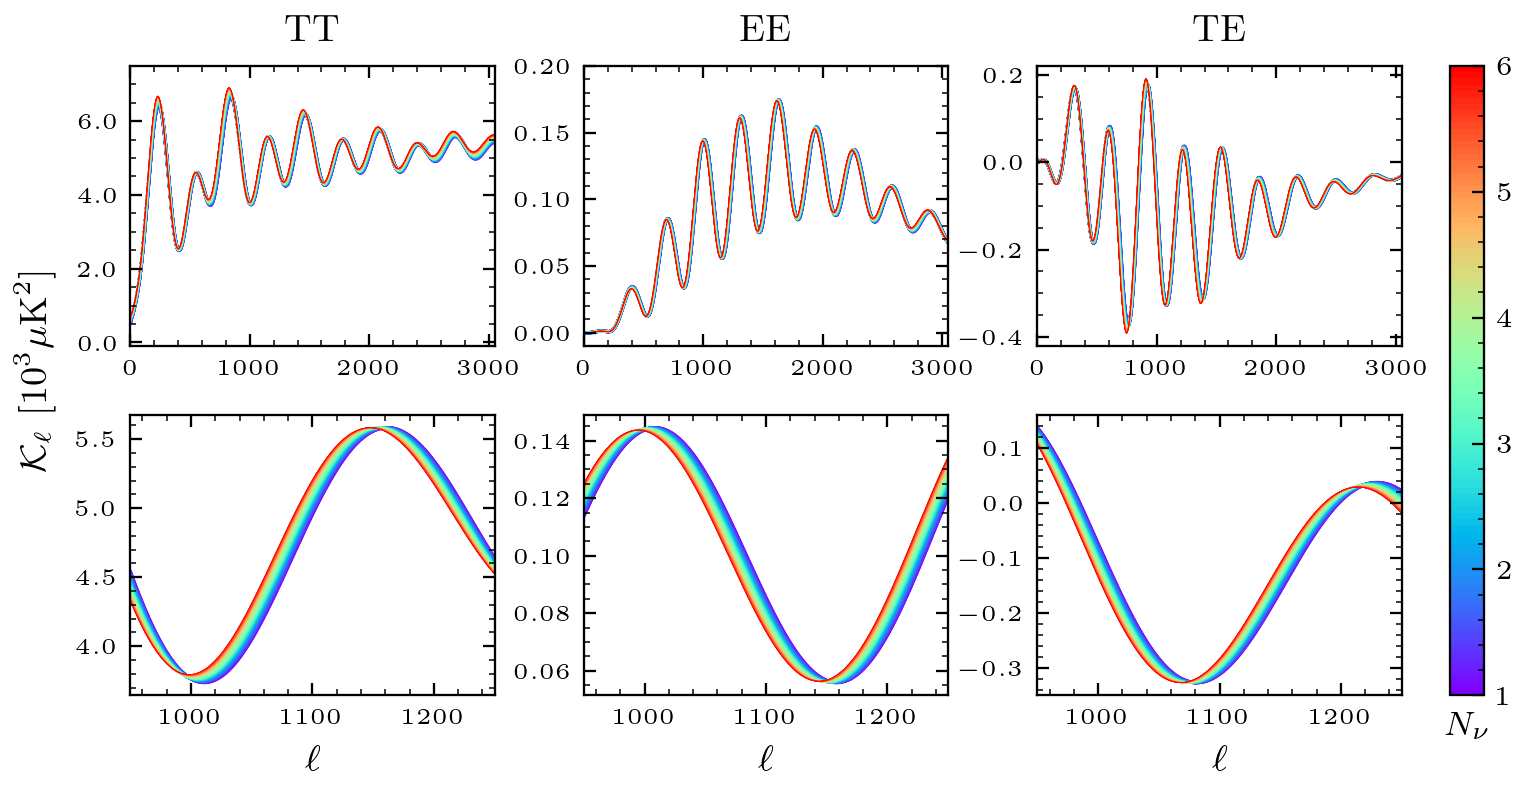

In [4]:
#############################################
############       FIGURE 1      ############
#############################################

fig1=plt.figure(figsize=(6,3),dpi=300)

gs1 = GridSpec(22,34,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:10])
ax12 = fig1.add_subplot(gs1[12:21,1:10])
ax2 = fig1.add_subplot(gs1[1:10,12:21])
ax22 = fig1.add_subplot(gs1[12:21,12:21])
ax3 = fig1.add_subplot(gs1[1:10,23:32])
ax32 = fig1.add_subplot(gs1[12:21,23:32])
axNeff = fig1.add_subplot(gs1[1:-1,33])


colors = plt.cm.rainbow(np.linspace(0, 1, len(N_eff)))
lws = np.linspace(0.1, .8, len(N_eff))[::-1]
cmap = plt.get_cmap('rainbow', len(N_eff))
# Normalizer
norm = mpl.colors.Normalize(vmin=np.min(N_eff), vmax=np.max(N_eff))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
axNeff.tick_params(axis='both', which='major', labelsize=6.5)
axNeff.tick_params(axis='both', which='minor', labelsize=6.5)
axNeff.set_xticks([])
for i in trange(len(N_eff)):
    ells=Kells_TT_EE_TE[i,0]
    Kls_TT_lens_norm=Kells_TT_EE_TE[i,1]
    Kls_EE_lens_norm=Kells_TT_EE_TE[i,2]
    Kls_TE_lens_norm=Kells_TT_EE_TE[i,3]
    ax1.plot(ells,Kls_TT_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax2.plot(ells,Kls_EE_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax3.plot(ells,Kls_TE_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax12.plot(ells[(ells>=950) & (ells<=1250)],Kls_TT_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    ax22.plot(ells[(ells>=950) & (ells<=1250)],Kls_EE_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    ax32.plot(ells[(ells>=950) & (ells<=1250)],Kls_TE_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    del ells, Kls_TT_lens_norm, Kls_EE_lens_norm, Kls_TE_lens_norm
plt.colorbar(sm,cax=axNeff)
ax1.tick_params(axis='both', which='major', labelsize=5.5)
ax1.tick_params(axis='both', which='minor', labelsize=5.5)
ax2.tick_params(axis='both', which='major', labelsize=5.5)
ax2.tick_params(axis='both', which='minor', labelsize=5.5)
ax3.tick_params(axis='both', which='major', labelsize=5.5)
ax3.tick_params(axis='both', which='minor', labelsize=5.5)
ax12.tick_params(axis='both', which='major', labelsize=5.5)
ax12.tick_params(axis='both', which='minor', labelsize=5.5)
ax22.tick_params(axis='both', which='major', labelsize=5.5)
ax22.tick_params(axis='both', which='minor', labelsize=5.5)
ax32.tick_params(axis='both', which='major', labelsize=5.5)
ax32.tick_params(axis='both', which='minor', labelsize=5.5)
ax1.set_ylim(-0.1,7.5)
ax2.set_ylim(-0.01,0.2)
ax1.set_xlim(0,3050)
ax2.set_xlim(0,3050)
ax3.set_xlim(0,3050)
ax12.set_xlim(950,1250)
ax22.set_xlim(950,1250)
ax32.set_xlim(950,1250)
ax12.set_xticks([1000,1100,1200])
ax22.set_xticks([1000,1100,1200])
ax32.set_xticks([1000,1100,1200])
ax1.set_xticks([0,1000,2000,3000])
ax2.set_xticks([0,1000,2000,3000])
ax3.set_xticks([0,1000,2000,3000])
ax1.set_yticks([0,2,4,6])
ax32.set_yticks([-0.3,-0.2,-0.1,0,0.1])
ax1.set_yticklabels(['0.0','2.0','4.0','6.0'])

ax1.set_title(r'TT',fontdict={'fontsize':9,'family':'serif'})
ax2.set_title(r'EE',fontdict={'fontsize':9,'family':'serif'})
ax3.set_title(r'TE',fontdict={'fontsize':9,'family':'serif'})
ax12.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax22.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax32.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
axNeff.set_xlabel(r'$N_\nu$',fontdict={'fontsize':8,'family':'serif'})
ax12.text(855,6.0,r'$\mathcal{K}_\ell$ [$10^3 \mu\mathrm{K}^2$]',rotation=90,va='center',fontdict={'fontsize':9,'family':'serif'})
plt.savefig(main_plots_dir+'Kells_noisw_vs_Neff.png')
plt.show()
plt.close()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 273.37it/s]


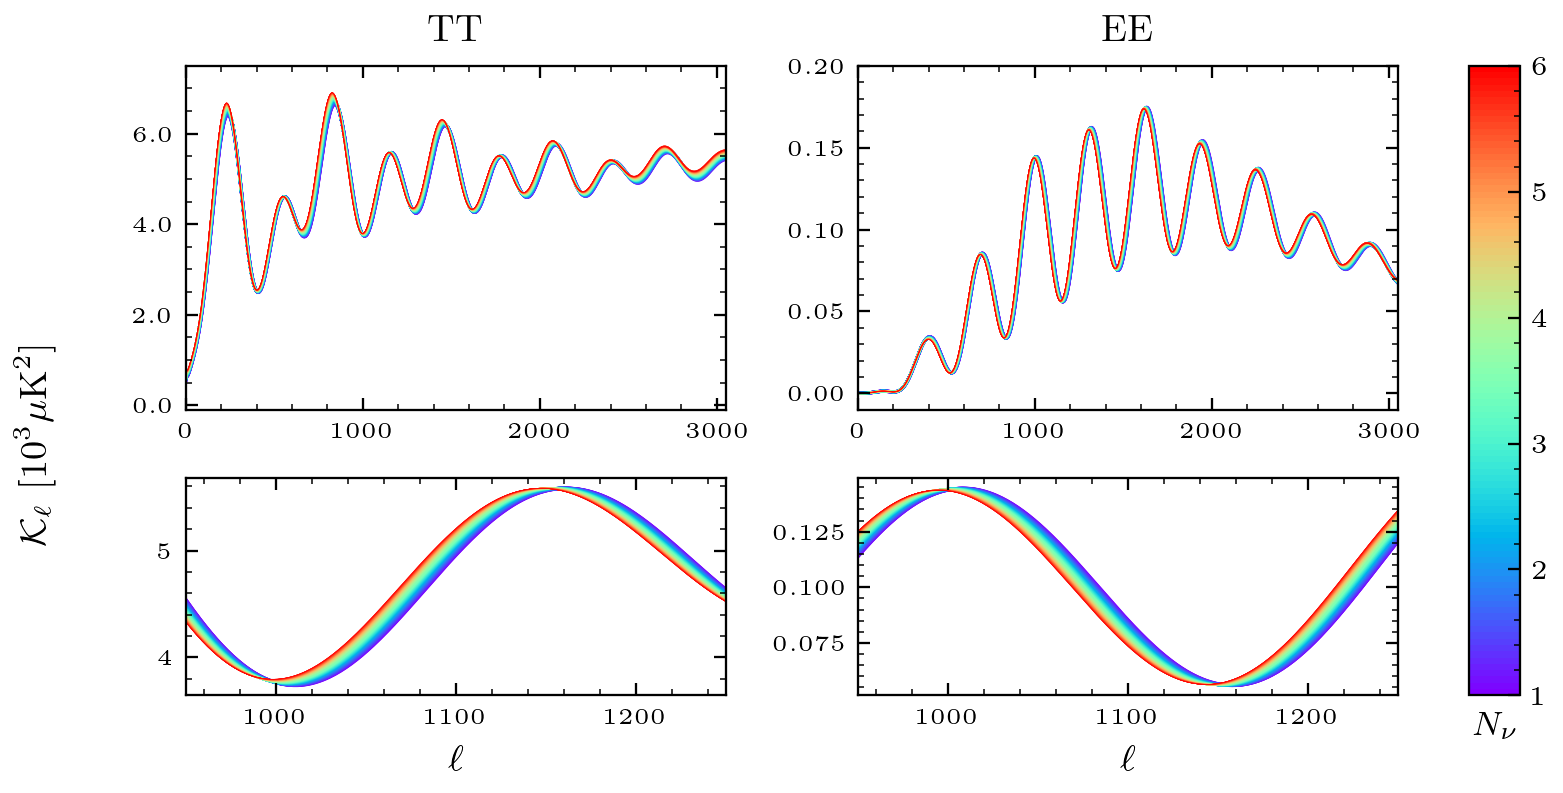

In [8]:
################################################
############       FIGURE 1 v2      ############
################################################

fig1=plt.figure(figsize=(6,3),dpi=300)

gs1 = GridSpec(22,23,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:12,1:10])
ax12 = fig1.add_subplot(gs1[14:21,1:10])
ax2 = fig1.add_subplot(gs1[1:12,12:21])
ax22 = fig1.add_subplot(gs1[14:21,12:21])
axNeff = fig1.add_subplot(gs1[1:-1,-1])


colors = plt.cm.rainbow(np.linspace(0, 1, len(N_eff)))
lws = np.linspace(0.1, .8, len(N_eff))[::-1]
cmap = plt.get_cmap('rainbow', len(N_eff))
# Normalizer
norm = mpl.colors.Normalize(vmin=np.min(N_eff), vmax=np.max(N_eff))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
axNeff.tick_params(axis='both', which='major', labelsize=6.5)
axNeff.tick_params(axis='both', which='minor', labelsize=6.5)
axNeff.set_xticks([])
for i in trange(len(N_eff)):
    ells=Kells_TT_EE_TE[i,0]
    Kls_TT_lens_norm=Kells_TT_EE_TE[i,1]
    Kls_EE_lens_norm=Kells_TT_EE_TE[i,2]
    ax1.plot(ells,Kls_TT_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax2.plot(ells,Kls_EE_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax12.plot(ells[(ells>=950) & (ells<=1250)],Kls_TT_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    ax22.plot(ells[(ells>=950) & (ells<=1250)],Kls_EE_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    del ells, Kls_TT_lens_norm, Kls_EE_lens_norm
plt.colorbar(sm,cax=axNeff)
ax1.tick_params(axis='both', which='major', labelsize=5.5)
ax1.tick_params(axis='both', which='minor', labelsize=5.5)
ax2.tick_params(axis='both', which='major', labelsize=5.5)
ax2.tick_params(axis='both', which='minor', labelsize=5.5)
ax12.tick_params(axis='both', which='major', labelsize=5.5)
ax12.tick_params(axis='both', which='minor', labelsize=5.5)
ax22.tick_params(axis='both', which='major', labelsize=5.5)
ax22.tick_params(axis='both', which='minor', labelsize=5.5)
ax1.set_ylim(-0.1,7.5)
ax2.set_ylim(-0.01,0.2)
ax1.set_xlim(0,3050)
ax2.set_xlim(0,3050)
ax12.set_xlim(950,1250)
ax22.set_xlim(950,1250)
ax12.set_xticks([1000,1100,1200])
ax22.set_xticks([1000,1100,1200])
ax1.set_xticks([0,1000,2000,3000])
ax2.set_xticks([0,1000,2000,3000])
ax1.set_yticks([0,2,4,6])
ax1.set_yticklabels(['0.0','2.0','4.0','6.0'])

ax1.set_title(r'TT',fontdict={'fontsize':9,'family':'serif'})
ax2.set_title(r'EE',fontdict={'fontsize':9,'family':'serif'})
ax12.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax22.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
axNeff.set_xlabel(r'$N_\nu$',fontdict={'fontsize':8,'family':'serif'})
ax12.text(855,6.0,r'$\mathcal{K}_\ell$ [$10^3 \mu\mathrm{K}^2$]',rotation=90,va='center',fontdict={'fontsize':9,'family':'serif'})
plt.savefig(main_plots_dir+'Kells_noisw_vs_Neff_v2.png')
plt.show()
plt.close()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 207.34it/s]


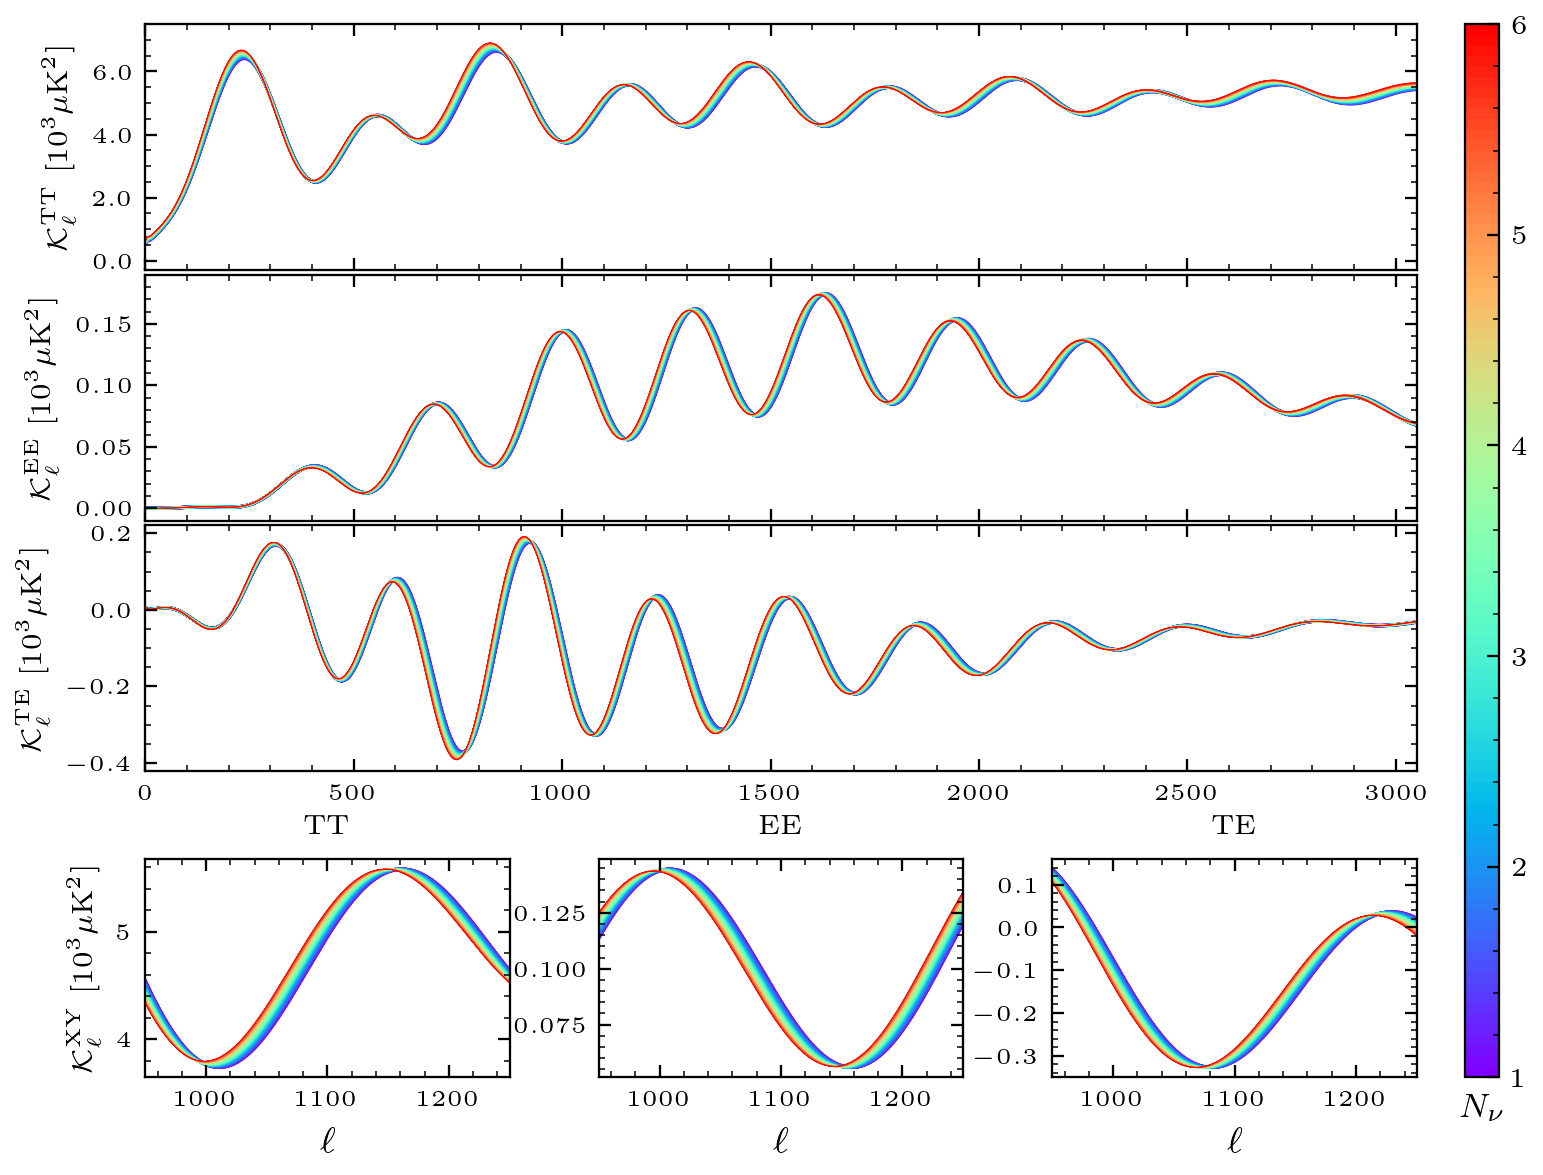

In [15]:
#############################################
############       FIGURE 1      ############
#############################################

fig1=plt.figure(figsize=(6,4.8),dpi=300)

gs1 = GridSpec(40,34,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:32])
ax2 = fig1.add_subplot(gs1[10:19,1:32])
ax3 = fig1.add_subplot(gs1[19:28,1:32])
ax12 = fig1.add_subplot(gs1[31:39,1:10])
ax22 = fig1.add_subplot(gs1[31:39,12:21])
ax32 = fig1.add_subplot(gs1[31:39,23:32])
axNeff = fig1.add_subplot(gs1[1:-1,33])


colors = plt.cm.rainbow(np.linspace(0, 1, len(N_eff)))
lws = np.linspace(0.1, .8, len(N_eff))[::-1]
cmap = plt.get_cmap('rainbow', len(N_eff))
# Normalizer
norm = mpl.colors.Normalize(vmin=np.min(N_eff), vmax=np.max(N_eff))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
axNeff.tick_params(axis='both', which='major', labelsize=6.5)
axNeff.tick_params(axis='both', which='minor', labelsize=6.5)
axNeff.set_xticks([])
for i in trange(len(N_eff)):
    ells=Kells_TT_EE_TE[i,0]
    Kls_TT_lens_norm=Kells_TT_EE_TE[i,1]
    Kls_EE_lens_norm=Kells_TT_EE_TE[i,2]
    Kls_TE_lens_norm=Kells_TT_EE_TE[i,3]
    ax1.plot(ells,Kls_TT_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax2.plot(ells,Kls_EE_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax3.plot(ells,Kls_TE_lens_norm,c=colors[i],lw=lws[i],ls='solid')
    ax12.plot(ells[(ells>=950) & (ells<=1250)],Kls_TT_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    ax22.plot(ells[(ells>=950) & (ells<=1250)],Kls_EE_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    ax32.plot(ells[(ells>=950) & (ells<=1250)],Kls_TE_lens_norm[(ells>=950) & (ells<=1250)],c=colors[i],lw=lws[i],ls='solid')
    del ells, Kls_TT_lens_norm, Kls_EE_lens_norm, Kls_TE_lens_norm
plt.colorbar(sm,cax=axNeff)
ax1.tick_params(axis='both', which='major', labelsize=5.5)
ax1.tick_params(axis='both', which='minor', labelsize=5.5)
ax2.tick_params(axis='both', which='major', labelsize=5.5)
ax2.tick_params(axis='both', which='minor', labelsize=5.5)
ax3.tick_params(axis='both', which='major', labelsize=5.5)
ax3.tick_params(axis='both', which='minor', labelsize=5.5)
ax12.tick_params(axis='both', which='major', labelsize=5.5)
ax12.tick_params(axis='both', which='minor', labelsize=5.5)
ax22.tick_params(axis='both', which='major', labelsize=5.5)
ax22.tick_params(axis='both', which='minor', labelsize=5.5)
ax32.tick_params(axis='both', which='major', labelsize=5.5)
ax32.tick_params(axis='both', which='minor', labelsize=5.5)
ax1.set_ylim(-0.3,7.5)
ax1.set_yticks([0,2,4,6])
ax1.set_yticklabels(['0.0','2.0','4.0','6.0'])
ax2.set_ylim(-0.01,0.19)
ax1.set_xlim(0,3050)
ax2.set_xlim(0,3050)
ax3.set_xlim(0,3050)
ax1.set_xticks([0,500,1000,1500, 2000,2500, 3000])
ax2.set_xticks([0,500,1000,1500, 2000,2500, 3000])
ax3.set_xticks([0,500,1000,1500, 2000,2500, 3000])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax12.set_xlim(950,1250)
ax22.set_xlim(950,1250)
ax32.set_xlim(950,1250)
ax12.set_xticks([1000,1100,1200])
ax22.set_xticks([1000,1100,1200])
ax32.set_xticks([1000,1100,1200])


ax32.set_yticks([-0.3,-0.2,-0.1,0,0.1])

ax1.set_ylabel(r'$\mathcal{K}^{\rm{TT}}_\ell$ [$10^3 \mu\mathrm{K}^2$]',fontdict={'fontsize':7,'family':'serif'})
ax2.set_ylabel(r'$\mathcal{K}^{\rm{EE}}_\ell$ [$10^3 \mu\mathrm{K}^2$]',fontdict={'fontsize':7,'family':'serif'})
ax3.set_ylabel(r'$\mathcal{K}^{\rm{TE}}_\ell$ [$10^3 \mu\mathrm{K}^2$]',fontdict={'fontsize':7,'family':'serif'})
ax12.set_ylabel(r'$\mathcal{K}^{\rm{XY}}_\ell$ [$10^3 \mu\mathrm{K}^2$]',fontdict={'fontsize':7,'family':'serif'})
ax12.set_title(r'TT',fontdict={'fontsize':6.5,'family':'serif'})
ax22.set_title(r'EE',fontdict={'fontsize':6.5,'family':'serif'})
ax32.set_title(r'TE',fontdict={'fontsize':6.5,'family':'serif'})
ax12.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax22.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax32.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
axNeff.set_xlabel(r'$N_\nu$',fontdict={'fontsize':8,'family':'serif'})
#ax12.text(855,6.0,r'$\mathcal{K}_\ell$ [$10^3 \mu\mathrm{K}^2$]',rotation=90,va='center',fontdict={'fontsize':9,'family':'serif'})
plt.savefig(main_plots_dir+'Kells_noisw_vs_Neff_v3.png')
plt.show()
plt.close()

# 2. Spectrum Based Template $f_{\ell}$

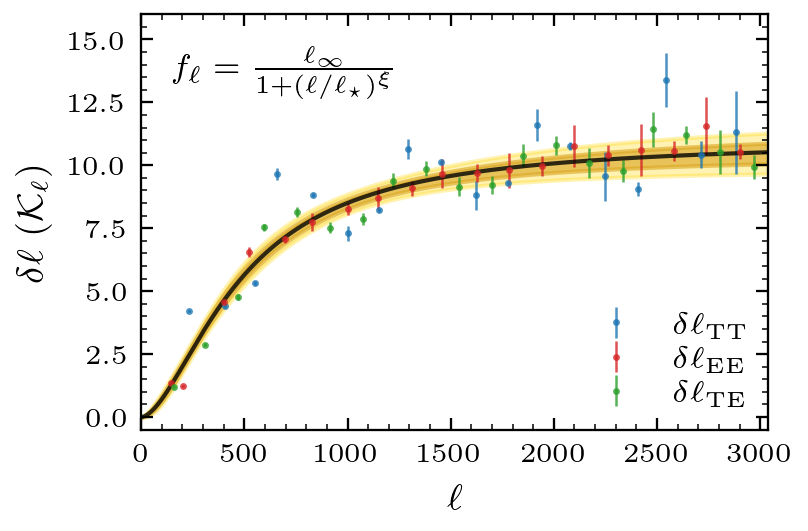

In [16]:
fig1=plt.figure(figsize=(3,2),dpi=300)

gs1 = GridSpec(20,20,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:-1,1:-1])

ax1.errorbar(ell_pksTT_lcdm_lens,dell_TT_avg_lens,yerr=dell_TT_std_lens, marker='.',c='tab:blue',alpha=0.8,markersize=1.3,ls='none',elinewidth=.6,label=r'$\delta\ell_{\rm{TT}}$')
ax1.errorbar(ell_pksEE_lcdm_lens,dell_EE_avg_lens,yerr=dell_EE_std_lens, marker='.',c='tab:red',alpha=0.8,markersize=1.3,ls='none',elinewidth=.6,label=r'$\delta\ell_{\rm{EE}}$')
ax1.errorbar(ell_pksTE_lcdm_lens,dell_TE_avg_lens,yerr=dell_TE_std_lens, marker='.',c='tab:green',alpha=0.8,markersize=1.3,ls='none',elinewidth=.6,label=r'$\delta\ell_{\rm{TE}}$')

ax1.fill_between(ells_SBT,f_ell_2msigma, f_ell_2psigma,color='gold',alpha=0.3)
ax1.fill_between(ells_SBT,f_ell_1msigma, f_ell_1psigma,color='goldenrod', alpha=0.6)
ax1.plot(ells_SBT,f_ell_best_fit,ls='solid',c='k',alpha=0.8,linewidth=1)


ax1.legend(prop={'family':'serif','size':7.5},loc=4)
ax1.set_ylabel(r'$\delta\ell$ ($\mathcal{K}_\ell$)',fontdict={'fontsize':9,'family':'serif'})
ax1.set_xlabel(r'$\ell$',fontdict={'fontsize':9,'family':'serif'})
ax1.text(150,13.5, r'$f_\ell=\frac{\ell_{\infty}}{1+(\ell/\ell_{\star})^\xi}$',fontdict={'fontsize':8,'family':'serif'})
ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)

ax1.set_ylim(-.5,16)
ax1.set_xlim(0, 3040)
plt.savefig(main_plots_dir+'phase_shift_template_TT_EE_TE.png')
plt.show()
plt.close()

